MUCHINA FADZAI ETHEL(M.TECH AIML)
AP22122040013

The K-Nearest Neighbors (KNN) classifier is a simple yet effective algorithm for classification tasks. In the context of natural language processing (NLP), KNN can be used in combination with a frequency vectorizer to classify text documents.
The frequency vectorizer works by creating a "bag of words" representation of the text data, where each word in the text is treated as a separate feature. The frequency vectorizer then counts the frequency of each word in the text and creates a vector of numbers that represent the frequency of each word in the text.

KNN using frequency vectorizer
steps

1.importing the necessary packages
2. load datasets
3.Concatenate the datasets for better visualization and easy computation(check for missing values and replace with mean ,mode , median)
4.Split the data into training and testing sets
5.Convert the text data into frequency vectors
6.Train the KNN classifier
7.Make predictions on the test data
8.Evaluate the accuracy of the model
9.To plot the results, use a confusion matrix to visualize the performance of the KNN classifier on the test data.


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [2]:
nisha_df = pd.read_csv('/content/nisha_preprocessing.csv')
kabita_df = pd.read_csv('/content/kabitakitchen.csv', encoding = 'latin1')
kabita_pre_df = pd.read_csv('/content/kabita_preprocessing.csv')
nishafin_df = pd.read_csv('/content/Nishafin.csv')

In [3]:
kabita_df

,id,commentText,Labels
0,Ugy_CBm-_CKA3YqrzcB4AaABAg,Pudina ptta nhi dalu to,7
1,Ugy9mx9nuTWJu4dRac14AaABAg,Chiken kacha tu ni rhy ga sis,7
2,Ugz8T2MKLYucL3dM9nh4AaABAg,"Hello mam, I love your all recipes.... ðð...",4
3,Ugx_1cCjRbCaDgL0FLF4AaABAg,Its awesome recipe plzz make handi chicken in ...,2
4,UgzLhKVAJ6NN3nZXyjN4AaABAg,Yeh jo measurement hai.........kitne logon ke ...,7
...,...,...,...
4895,UgjFXyC0Qhzk5ngCoAEC,i love chole...thank you kabitaji for sharing ...,1
4896,UghP3bitlJuM13gCoAEC,thnakyou mm,1
4897,UghztLZOqvedfXgCoAEC,thanks mam,1
4898,UggX5Fi2Y430zXgCoAEC,u r fabulous,4


In [4]:
kabita_pre_df

,id,commentText,Labels,stopwords,upper,hastags,word_count,char_count,avg_word,numerics
0,Ugy_CBm-_CKA3YqrzcB4AaABAg,pudina ptta nhi dalu,7,1,0,0,4,20,4.250000,0
1,Ugy9mx9nuTWJu4dRac14AaABAg,chiken kacha tu ni rhy ga sis,7,0,0,0,7,29,3.285714,0
2,Ugz8T2MKLYucL3dM9nh4AaABAg,hello mam i love recipes all ingredients easi...,4,9,1,0,13,78,5.500000,0
3,Ugx_1cCjRbCaDgL0FLF4AaABAg,its awesome recipe plzz make handi chicken handi,2,1,0,0,8,48,5.125000,0
4,UgzLhKVAJ6NN3nZXyjN4AaABAg,yeh jo measurement haikitne logon ke liye hai,7,0,0,0,8,45,4.750000,0
...,...,...,...,...,...,...,...,...,...,...
4895,UgjFXyC0Qhzk5ngCoAEC,love cholethank kabitaji sharing rhe recipei w...,1,8,0,0,13,93,6.230769,0
4896,UghP3bitlJuM13gCoAEC,thnakyou mm,1,0,0,0,2,11,5.000000,0
4897,UghztLZOqvedfXgCoAEC,thanks mam,1,0,0,0,2,10,4.500000,0
4898,UggX5Fi2Y430zXgCoAEC,u r fabulous,4,0,0,0,3,12,3.333333,0


In [5]:
nishafin_df

,id,commentText,Labels
0,Ugz7LQV0ZWpuNnjBaxJ4AaABAg,i love potato ke prathe,2
1,UgxvWJ_kJL2nePTkg2N4AaABAg,Wwaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaww,3
2,UgxxeUmiH9f8XOZZWr14AaABAg,Nice,3
3,Ugz-UPvwHMx4nSKVoCB4AaABAg,Wow Amazing,3
4,UgzfXhbesBABQzi4-m94AaABAg,Thank you madam,1
...,...,...,...
4895,UgyGSYkiLHY3dWl4AZt4AaABAg,Mam kya hum butter Ki bjaye desi ghee bhi daal...,7
4896,Ugzx3OSiIndEsUN54IB4AaABAg,Ky hum condensed milk k jagha par amul powder ...,7
4897,UgxRwq2MsR9csHLc7MJ4AaABAg,Very yummy cake mam...condensed milk k jagah a...,5
4898,UgxxO1vtL-g7PPRVXBp4AaABAg,mad aapne powder sugar or condensed milk dono ...,7


In [6]:
nisha_df

,id,commentText,Labels,stopwords,upper,hastags,word_count,char_count,avg_word,numerics
0,Ugz7LQV0ZWpuNnjBaxJ4AaABAg,love potato ke prathe,2,1,0,0,4,21,4.500000,0
1,UgxvWJ_kJL2nePTkg2N4AaABAg,wwaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaww,3,0,0,0,1,49,49.000000,0
2,UgxxeUmiH9f8XOZZWr14AaABAg,nice,3,0,0,0,1,4,4.000000,0
3,Ugz-UPvwHMx4nSKVoCB4AaABAg,wow amazing,3,0,0,0,2,11,5.000000,0
4,UgzfXhbesBABQzi4-m94AaABAg,thank madam,1,1,0,0,2,11,5.000000,0
...,...,...,...,...,...,...,...,...,...,...
4895,UgyGSYkiLHY3dWl4AZt4AaABAg,mam kya hum butter ki bjaye desi ghee bhi daal...,7,0,0,0,12,55,3.666667,0
4896,Ugzx3OSiIndEsUN54IB4AaABAg,ky hum condensed milk k jagha par amul powder ...,7,0,0,0,12,56,3.750000,0
4897,UgxRwq2MsR9csHLc7MJ4AaABAg,very yummy cake mamcondensed milk k jagah aur ...,5,0,0,0,15,79,4.333333,0
4898,UgxxO1vtL-g7PPRVXBp4AaABAg,mad aapne powder sugar condensed milk dono kyu...,7,2,0,0,11,56,4.600000,0


In [7]:
df = pd.concat([nisha_df, kabita_df, kabita_pre_df, nishafin_df], axis=0).reset_index(drop=True)
df

,id,commentText,Labels,stopwords,upper,hastags,word_count,char_count,avg_word,numerics
0,Ugz7LQV0ZWpuNnjBaxJ4AaABAg,love potato ke prathe,2,1.0,0.0,0.0,4.0,21.0,4.5,0.0
1,UgxvWJ_kJL2nePTkg2N4AaABAg,wwaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaww,3,0.0,0.0,0.0,1.0,49.0,49.0,0.0
2,UgxxeUmiH9f8XOZZWr14AaABAg,nice,3,0.0,0.0,0.0,1.0,4.0,4.0,0.0
3,Ugz-UPvwHMx4nSKVoCB4AaABAg,wow amazing,3,0.0,0.0,0.0,2.0,11.0,5.0,0.0
4,UgzfXhbesBABQzi4-m94AaABAg,thank madam,1,1.0,0.0,0.0,2.0,11.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
19595,UgyGSYkiLHY3dWl4AZt4AaABAg,Mam kya hum butter Ki bjaye desi ghee bhi daal...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19596,Ugzx3OSiIndEsUN54IB4AaABAg,Ky hum condensed milk k jagha par amul powder ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19597,UgxRwq2MsR9csHLc7MJ4AaABAg,Very yummy cake mam...condensed milk k jagah a...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19598,UgxxO1vtL-g7PPRVXBp4AaABAg,mad aapne powder sugar or condensed milk dono ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().sum()

id                0
commentText       2
Labels            0
stopwords      9800
upper          9800
hastags        9800
word_count     9800
char_count     9800
avg_word       9802
numerics       9800
dtype: int64

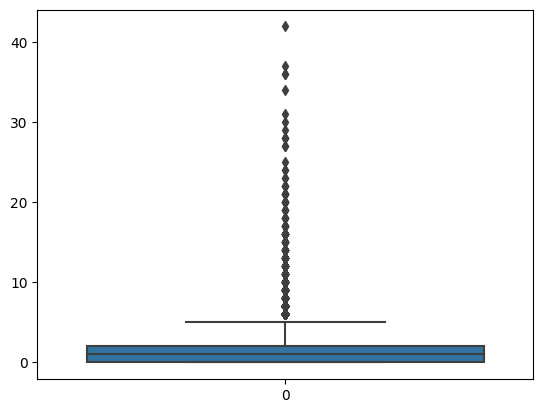

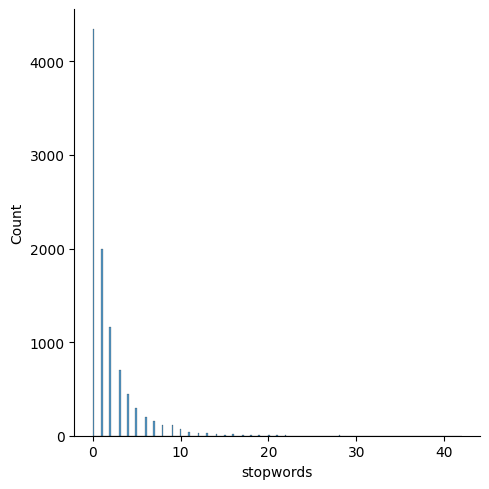

In [9]:

#
# Box plot
#
sns.boxplot(df.stopwords)

#
# Distribution plot
#
sns.displot(df.stopwords)

<Axes: >

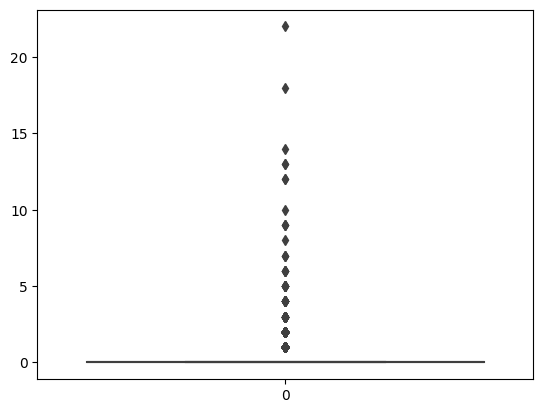

In [10]:
sns.boxplot(df.upper)

In [11]:
#df['stopwords'] = df['stopwords'].fillna(df['stopwords'].median())

#To insert the mean value of each column into its missing rows:

df.fillna(df.median(numeric_only=True).round(1), inplace=True)

df

,id,commentText,Labels,stopwords,upper,hastags,word_count,char_count,avg_word,numerics
0,Ugz7LQV0ZWpuNnjBaxJ4AaABAg,love potato ke prathe,2,1.0,0.0,0.0,4.0,21.0,4.5,0.0
1,UgxvWJ_kJL2nePTkg2N4AaABAg,wwaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaww,3,0.0,0.0,0.0,1.0,49.0,49.0,0.0
2,UgxxeUmiH9f8XOZZWr14AaABAg,nice,3,0.0,0.0,0.0,1.0,4.0,4.0,0.0
3,Ugz-UPvwHMx4nSKVoCB4AaABAg,wow amazing,3,0.0,0.0,0.0,2.0,11.0,5.0,0.0
4,UgzfXhbesBABQzi4-m94AaABAg,thank madam,1,1.0,0.0,0.0,2.0,11.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
19595,UgyGSYkiLHY3dWl4AZt4AaABAg,Mam kya hum butter Ki bjaye desi ghee bhi daal...,7,1.0,0.0,0.0,5.0,25.0,4.4,0.0
19596,Ugzx3OSiIndEsUN54IB4AaABAg,Ky hum condensed milk k jagha par amul powder ...,7,1.0,0.0,0.0,5.0,25.0,4.4,0.0
19597,UgxRwq2MsR9csHLc7MJ4AaABAg,Very yummy cake mam...condensed milk k jagah a...,5,1.0,0.0,0.0,5.0,25.0,4.4,0.0
19598,UgxxO1vtL-g7PPRVXBp4AaABAg,mad aapne powder sugar or condensed milk dono ...,7,1.0,0.0,0.0,5.0,25.0,4.4,0.0


In [12]:
df.isna().sum()

id             0
commentText    2
Labels         0
stopwords      0
upper          0
hastags        0
word_count     0
char_count     0
avg_word       0
numerics       0
dtype: int64

In [13]:
df['commentText']=df['commentText'].fillna(df['commentText'].mode()[0])




In [14]:
df.isna().sum()

id             0
commentText    0
Labels         0
stopwords      0
upper          0
hastags        0
word_count     0
char_count     0
avg_word       0
numerics       0
dtype: int64

In [15]:
df.describe()

,Labels,stopwords,upper,hastags,word_count,char_count,avg_word,numerics
count,19600.000000,19600.000000,19600.000000,19600.000000,19600.000000,19600.000000,19600.000000,19600.0
mean,4.000000,1.404031,0.096480,0.000663,6.021378,30.756020,4.506609,0.0
std,2.000051,2.154730,0.500959,0.032727,5.211620,27.696049,0.973191,0.0
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.600000,0.0
25%,2.000000,1.000000,0.000000,0.000000,5.000000,25.000000,4.400000,0.0
50%,4.000000,1.000000,0.000000,0.000000,5.000000,25.000000,4.400000,0.0
75%,6.000000,1.000000,0.000000,0.000000,5.000000,25.000000,4.428571,0.0
max,7.000000,42.000000,22.000000,3.000000,176.000000,895.000000,49.000000,0.0


In [16]:
df.corr()

,Labels,stopwords,upper,hastags,word_count,char_count,avg_word,numerics
Labels,1.000000,0.085706,0.024036,0.006236,0.210392,0.200276,-0.068400,NaN
stopwords,0.085706,1.000000,0.327144,0.033824,0.480476,0.539262,0.097716,NaN
upper,0.024036,0.327144,1.000000,0.024106,0.254246,0.255595,-0.045037,NaN
hastags,0.006236,0.033824,0.024106,1.000000,0.033721,0.040033,0.026645,NaN
word_count,0.210392,0.480476,0.254246,0.033721,1.000000,0.983369,-0.083463,NaN
char_count,0.200276,0.539262,0.255595,0.040033,0.983369,1.000000,0.019804,NaN
avg_word,-0.068400,0.097716,-0.045037,0.026645,-0.083463,0.019804,1.000000,NaN
numerics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['commentText'], df['Labels'], test_size=0.2, random_state=42)

In [18]:
df.shape

(19600, 10)

In [19]:

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)# fits the CountVectorizer to the training data X_train and transforms it into a matrix of token counts. The resulting matrix is assigned to the variable X_train_vec.

X_test_vec = vectorizer.transform(X_test)##fits the vectorizer to the training data and returns a transformed matrix,
 # while the transform() method applies the vectorizer to new data using the same vocabulary that was learned from the training data.

In [20]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_vec, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred = knn.predict(X_test_vec)
print(y_pred)

[5 7 2 ... 6 4 4]


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8017857142857143


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))



              precision    recall  f1-score   support

           1       0.93      0.83      0.88       635
           2       0.90      0.60      0.72       805
           3       0.66      0.75      0.70       487
           4       0.78      0.89      0.83       511
           5       0.64      0.94      0.76       394
           6       0.87      0.78      0.82       607
           7       0.84      0.98      0.91       481

    accuracy                           0.80      3920
   macro avg       0.80      0.82      0.80      3920
weighted avg       0.82      0.80      0.80      3920



The precision of the model is highest for class 1 (93%) and lowest for class 5 (64%). This means that the model is best at correctly identifying class 1 and worst at correctly identifying class 5.
The recall of the model is highest for class 7 (98%) and lowest for class 2 (60%). This means that the model is best at correctly identifying class 7 and worst at correctly identifying class 2.
The F1 score of the model is highest for class 7 (91%) and lowest for class 2 (72%). This metric takes into account both precision and recall, so it provides a more balanced view of the model's performance.
The accuracy of the model is 80%, which means that it correctly predicts the class label for 81% of the samples in the test set.


[[528   7   3   3  11  14   0]
 [  3 481  25  10   5  10   0]
 [  1 174 363   8   0   4   0]
 [  7  37  47 454   6  32   1]
 [ 83  70  20  23 371  13   0]
 [  6  27  23   8   1 474   8]
 [  7   9   6   5   0  60 472]]


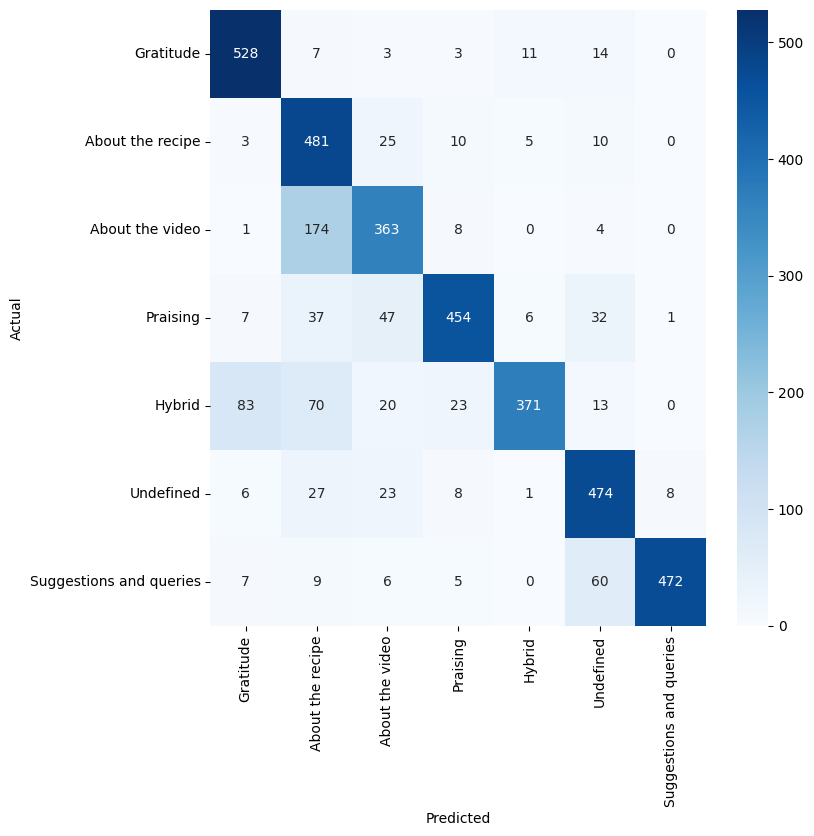

In [24]:

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g',
            xticklabels=['Gratitude', 'About the recipe', 'About the video', 'Praising', 'Hybrid', 'Undefined', 'Suggestions and queries'],
            yticklabels=['Gratitude', 'About the recipe', 'About the video', 'Praising', 'Hybrid', 'Undefined', 'Suggestions and queries'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()